In [33]:
pip install tensorflow

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.
/Users/prashanthsurapaneni/.zshenv:1: no such file or directory: /user/libexec/java_home

[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: /Users/prashanthsurapaneni/my_env/bin/python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [34]:
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [35]:
#training and testing data
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

In [36]:
print(f"Shape of x_training: {x_train.shape}")
print(f"Shape of y_training: {y_train.shape}")
print(f"Shape of x_testing: {x_test.shape}")
print(f"Shape of y_testing: {y_test.shape}")

Shape of x_training: (50000, 32, 32, 3)
Shape of y_training: (50000, 1)
Shape of x_testing: (10000, 32, 32, 3)
Shape of y_testing: (10000, 1)


In [37]:
#define to asign labels
classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

In [38]:
#print labels using y_train
for i in range(10):
    print(classes[y_train[i][0]])

frog
truck
truck
deer
automobile
automobile
bird
horse
ship
cat


In [39]:
#function to print images for training 
def plot_samples(index):
  plt.figure(figsize=(15,2))
  plt.imshow(x_train[index])

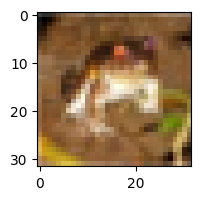

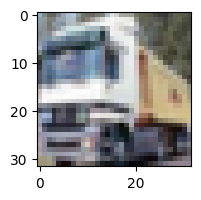

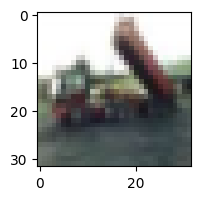

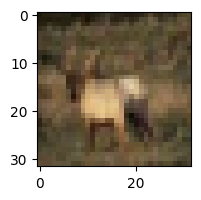

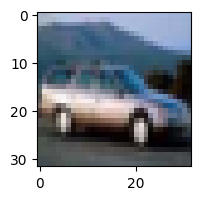

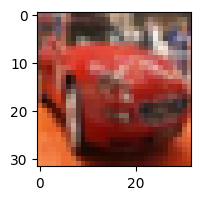

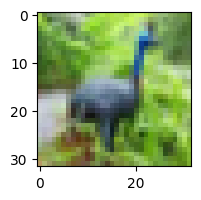

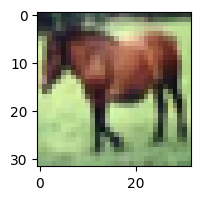

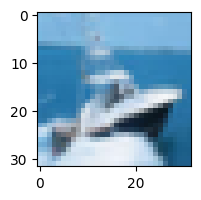

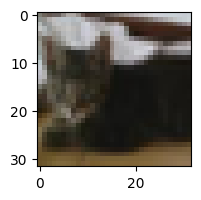

In [40]:
for i in range(10):
  plot_samples(i)

In [45]:
#scaling x_training and x_testing by dividing with 255
x_train_scaled = x_train / 255
x_test_scaled = x_test / 255

#perform one hot encoding by using keras built in api
y_train_categorical = keras.utils.to_categorical(y_train, num_classes = 10)
y_test_categorical = keras.utils.to_categorical(y_test, num_classes = 10)

In [46]:
#creating model 
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (32, 32, 3)), #flattening data into 1d
    #hidden layers
    keras.layers.Dense(3000, activation = 'relu'),
    keras.layers.Dense(1000, activation = 'relu'),
    #output layer
    keras.layers.Dense(10, activation = 'sigmoid')
])

In [47]:
model.compile(
    optimizer = 'SGD', #Stochastic Gradient Descent
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)
model.fit(x_train_scaled, y_train_categorical, epochs = 5)

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 25s 16ms/step - accuracy: 0.3571 - loss: 1.8107
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 25s 16ms/step - accuracy: 0.4297 - loss: 1.6213
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 24s 16ms/step - accuracy: 0.4561 - loss: 1.5408
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 24s 16ms/step - accuracy: 0.4764 - loss: 1.4814
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 25s 16ms/step - accuracy: 0.4947 - loss: 1.4311


to increase accuracy to around 90% use 50 as epochs, and try to run it on GPU

In [48]:
predictions = model.predict(x_test_scaled)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


In [49]:
predictions

array([[0.278877  , 0.29450196, 0.8258139 , ..., 0.053206  , 0.8023699 ,
        0.04614548],
       [0.81091696, 0.8626311 , 0.35883242, ..., 0.05530931, 0.99743974,
        0.8938964 ],
       [0.9344873 , 0.6951375 , 0.4820783 , ..., 0.13849786, 0.99652696,
        0.7455377 ],
       ...,
       [0.08683048, 0.05457249, 0.87526184, ..., 0.60714316, 0.48204985,
        0.12284439],
       [0.32129508, 0.20573509, 0.8537926 , ..., 0.35935426, 0.37633938,
        0.11476965],
       [0.36153123, 0.10307511, 0.78644544, ..., 0.8175093 , 0.49579173,
        0.18928252]], shape=(10000, 10), dtype=float32)